# Step 2: Preparing data for training

Objectives

- 3.1. Importing daily scores from news folder
- 3.2. Importing daily stock data from stock folder
- 3.3. Merge both the imported data with date
- 3.4. Saving the merged data
- 3.5. Check data by plotting the graph


In [11]:
import pandas as pd
import json

import matplotlib.pyplot as plt

### 3.1. Importing daily scores from news folder


In [12]:
with open('infosysdaily_scores.json', 'r') as file:
    sentimentScores = json.load(file)
#endwith

dfSentiment = pd.DataFrame(list(sentimentScores.items()), columns=['jsonDate', 'sentiment'])
dfSentiment['date'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')

dfSentiment['date'] = dfSentiment['date'].dt.strftime('%Y-%m-%d')
dfSentiment['jsonDate'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')
dfSentiment['jsonDate'] = dfSentiment['jsonDate'].dt.strftime('%Y-%m-%d')


dfSentiment.head()

,jsonDate,sentiment,date
0,2011-01-03,"[0.07110046595335007, 0.08782283961772919, 0.2...",2011-01-03
1,2011-01-05,"[0.08019362390041351, 0.10336549580097198, 0.2...",2011-01-05
2,2011-01-06,"[0.21877044439315796, 0.21242906153202057, 0.2...",2011-01-06
3,2011-01-07,"[0.1756400465965271, 0.1912253350019455, 0.295...",2011-01-07
4,2011-01-08,"[0.20949625968933105, 0.21130837500095367, 0.2...",2011-01-08


### 3.2. Importing daily stock data from stock folder

- Data used will be of Habib Bank Limited (HBL)
- This bank is considered to be the top performing and one of the most profitable bank in the country [[Source: AsiaMoney](https://www.asiamoney.com/article/2bp0xnj0tjyfvvwhd8oow/awards/best-bank-awards/pakistans-best-domestic-bank-2023-hbl)]
- This bank has branches outside Pakistan as well


In [13]:
#csvFilePath = 'M:\miniproject\infosysBANK_2013-01-01_to_2024_01-01.csv'
dfCsv = pd.read_csv("inputdatafiles/INFY_2013-01-01_to_2024_01-01.csv")
dfCsv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,290.950012,291.237488,288.193756,288.606262,223.314941,2959992
1,2013-01-02,289.524994,291.000000,287.937500,288.649994,223.348785,4349944
2,2013-01-03,289.375000,293.606262,288.875000,292.237488,226.124695,10599288
3,2013-01-04,293.549988,294.368744,291.500000,293.693756,227.251526,8454008
4,2013-01-07,293.887512,297.487488,291.943756,296.850006,229.693741,8761624


### 3.3. Merge both the imported data with date


In [14]:
# Convert 'Date' column in dfCsv to datetime
dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%Y-%m-%d')

# Convert 'date' column in dfSentiment to datetime
dfSentiment['date'] = pd.to_datetime(dfSentiment['date'], format='%Y-%m-%d')

# Merge dfCsv and dfSentiment on 'date'
dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')

# Replace non-list values in 'sentiment' with [0, 0, 0, 0, 0]
dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: x if isinstance(x, list) else [0, 0, 0, 0, 0])

# Split 'sentiment' list into separate columns
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])

# Concatenate dfMerged and dfSentimentColumns
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)

# Drop unnecessary columns
dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])

dfMerged.to_csv('infosys_merged.csv', index=False)
# Display the first 10 rows of dfMerged
dfMerged.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,feature1,feature2,feature3,feature4,feature5
0,2013-01-01,290.950012,291.237488,288.193756,288.606262,223.314941,2959992,0.000000,0.000000,0.000000,0.000000,0.000000
1,2013-01-02,289.524994,291.000000,287.937500,288.649994,223.348785,4349944,0.200576,0.209980,0.269853,0.197970,0.121621
2,2013-01-03,289.375000,293.606262,288.875000,292.237488,226.124695,10599288,0.088452,0.063583,0.138101,0.197335,0.512529
3,2013-01-04,293.549988,294.368744,291.500000,293.693756,227.251526,8454008,0.161837,0.162750,0.193764,0.227246,0.254404
4,2013-01-07,293.887512,297.487488,291.943756,296.850006,229.693741,8761624,0.166472,0.188355,0.264978,0.219827,0.160368
5,2013-01-08,295.625000,295.993744,290.437500,293.000000,226.714737,12867424,0.149886,0.175609,0.285412,0.224423,0.164670
6,2013-01-09,292.524994,295.225006,290.412506,291.375000,225.457352,6149968,0.176262,0.177831,0.238924,0.223245,0.183739
7,2013-01-10,291.375000,292.831238,288.649994,290.287506,224.615875,10901016,0.240846,0.239539,0.283053,0.148023,0.088538
8,2013-01-11,315.125000,340.250000,315.125000,339.012512,262.317841,92852568,0.114742,0.130699,0.260246,0.275044,0.219269
9,2013-01-14,344.975006,354.618744,344.031250,350.812500,271.448334,50924760,0.127841,0.125119,0.232191,0.268901,0.245948


### 3.4. Saving the merged data

- Saving the file in CSV format ((infosys_merged.csv))


In [15]:
outputCsvPath = 'infosys_merged.csv'
dfMerged.to_csv(outputCsvPath, index=False)

### 3.5. Check data by plotting the graph


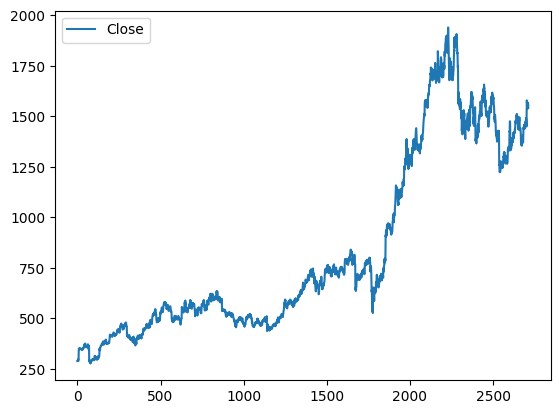

In [16]:
dfMerged[['Close']].plot()
plt.show()